# Supervised CARE Training

Here we use CARE training using noisy images as input and averaged noisy images as target.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../')
from unet.model import UNet
from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

### Download data
Download the data from https://zenodo.org/record/5156913/files/Convallaria_diaphragm.zip?download=1. Here we show the pipeline for Convallaria dataset. Save the dataset in an appropriate path. For us, the path is the data folder which exists at `../../../`. For Convallaria, the data to be denoised is named ```20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif```.

In [2]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data'):
    os.mkdir('../../../data')

zipPath="../../../data/Convallaria_diaphragm.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve('https://zenodo.org/record/5156913/files/Convallaria_diaphragm.zip?download=1', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data")


### Load Data
#### Ensure ```filename = 20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif``` and specify the ```dataname```  

In [3]:
path='../../../data/Convallaria_diaphragm/'
fileName='20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif'
dataName='convallaria' # This will be used to name the "care" model

#### Noisy Data (Input to network)

In [4]:
data=imread(path+fileName)
nameModel=dataName+'_care'

#### Ground truth  Data (Target of Network)

In [5]:
dataGT = np.mean(data, axis=0)[np.newaxis,...,np.newaxis]

In [6]:
data=data[...,np.newaxis]
dataGT = np.repeat(dataGT, 100, axis=0)

print("Shape of Raw Noisy Image is ", data.shape, "; Shape of Target Image is ", dataGT.shape)
data = np.concatenate((data,dataGT),axis=-1)
# Add the target image as a second channel to `data`
print("Shape of `data` is ", data.shape)

Shape of Raw Noisy Image is  (100, 1024, 1024, 1) ; Shape of Target Image is  (100, 1024, 1024, 1)
Shape of `data` is  (100, 1024, 1024, 2)


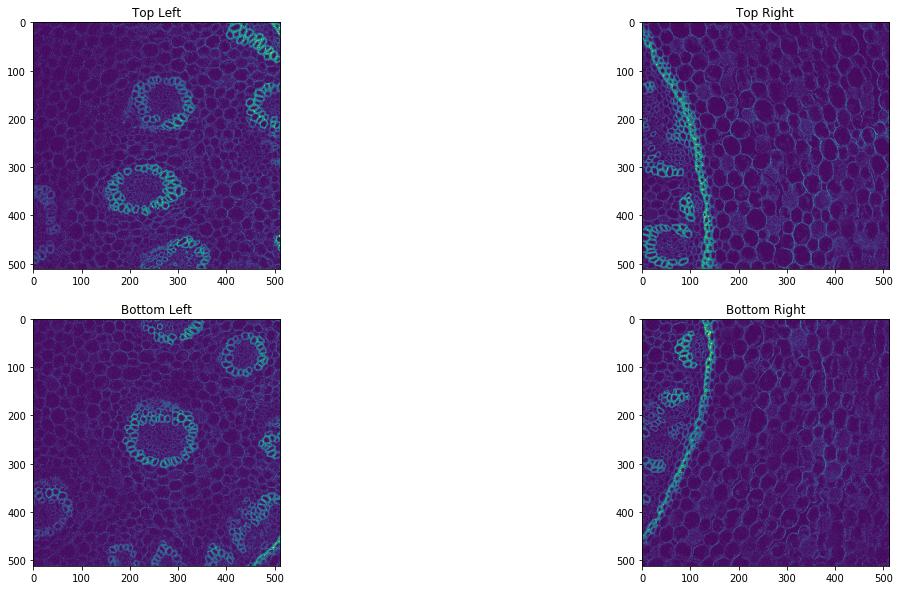

In [7]:
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.imshow(data[0,:512,:512,0])
plt.title('Top Left')

plt.subplot(2,2,2)
plt.imshow(data[0,:512,512:,0])
plt.title('Top Right')

plt.subplot(2,2,3)
plt.imshow(data[0,512:,:512,0])
plt.title('Bottom Left')

plt.subplot(2,2,4)
plt.imshow(data[0,512:,512:,0])
plt.title('Bottom Right')
plt.show()

# We now crop away the top-left portion of the data since this portion will be used later for testing
data=np.concatenate( (data[:,512:,512:,:], data[:,:512,512:,:], data[:,512:,:512,:])  )

### Create the Network and Train it
This can take a while. Ensure that `supervised` = `True`.

In [8]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix=nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=5, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3, supervised=True)

Epoch 0 finished      
avg. loss: 0.43323035463690757+-(2SEM)0.2026434886555207      
Epoch 1 finished      
avg. loss: 0.23816210478544236+-(2SEM)0.09398632974829382      
Epoch 2 finished      
avg. loss: 0.044894535606727+-(2SEM)0.012150855006897398      
Epoch 3 finished      
avg. loss: 0.05075239259749651+-(2SEM)0.015298561721634431      
Epoch 4 finished      
avg. loss: 0.033327493164688346+-(2SEM)0.005088209494884152      
Epoch 5 finished      
avg. loss: 0.03339521284215152+-(2SEM)0.013319933595279262      
Epoch 6 finished      
avg. loss: 0.03226342150010168+-(2SEM)0.009633553654267917      
Epoch 7 finished      
avg. loss: 0.03126826845109463+-(2SEM)0.011976029760227202      
Epoch 8 finished      
avg. loss: 0.022232138877734543+-(2SEM)0.005131755643827113      
Epoch 9 finished      
avg. loss: 0.028599790902808307+-(2SEM)0.007844173185096006      
Epoch 10 finished      
avg. loss: 0.02990412190556526+-(2SEM)0.010189225178157662      
Epoch 11 finished      
avg. loss

Epoch 90 finished      
avg. loss: 0.015971766225993632+-(2SEM)0.005700942691248021      
Epoch 91 finished      
avg. loss: 0.017853579996153713+-(2SEM)0.0031269373974292017      
Epoch 92 finished      
avg. loss: 0.016123474785126747+-(2SEM)0.005153366045891016      
Epoch 93 finished      
avg. loss: 0.018288263608701526+-(2SEM)0.006015875380107314      
Epoch 94 finished      
avg. loss: 0.014418972143903374+-(2SEM)0.002941302234813841      
Epoch 95 finished      
avg. loss: 0.019578326446935534+-(2SEM)0.006926483464457062      
Epoch 96 finished      
avg. loss: 0.01996777249732986+-(2SEM)0.006065530990859668      
Epoch 97 finished      
avg. loss: 0.016133934701792897+-(2SEM)0.003493246435157074      
Epoch 98 finished      
avg. loss: 0.016049786331132056+-(2SEM)0.005036128465541213      
Epoch 99 finished      
avg. loss: 0.014404597878456115+-(2SEM)0.0036848064422341283      
Epoch    99: reducing learning rate of group 0 to 6.2500e-05.
Epoch 100 finished      
avg. loss: 0

Epoch 176 finished      
avg. loss: 0.013680750504136086+-(2SEM)0.0028370750932753047      
Epoch   176: reducing learning rate of group 0 to 4.8828e-07.
Epoch 177 finished      
avg. loss: 0.016330072260461747+-(2SEM)0.005744348250869998      
Epoch 178 finished      
avg. loss: 0.015034979558549821+-(2SEM)0.004162061474819202      
Epoch 179 finished      
avg. loss: 0.016852901550009847+-(2SEM)0.004685016746400652      
Epoch 180 finished      
avg. loss: 0.017367255804128946+-(2SEM)0.005003392495342018      
Epoch 181 finished      
avg. loss: 0.011181662557646632+-(2SEM)0.0033304683777019466      
Epoch 182 finished      
avg. loss: 0.017901432537473737+-(2SEM)0.006111669770037619      
Epoch 183 finished      
avg. loss: 0.012918050470761954+-(2SEM)0.002327217405662938      
Epoch 184 finished      
avg. loss: 0.012195863435044885+-(2SEM)0.0022607394870457617      
Epoch 185 finished      
avg. loss: 0.015576294204220176+-(2SEM)0.004849194480847002      
Epoch 186 finished      


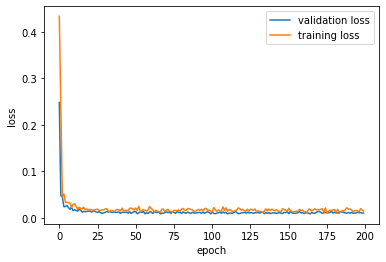

In [9]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()